# Traffic Sign Identification

Dataset - https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed

In [1]:
#Import packages
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive



Mounted at /gdrive
/gdrive


In [3]:
%ls MyDrive/modules

__pycache__/  traffic_utils_online.py


In [4]:
import sys
sys.path.append("MyDrive/modules")
from traffic_utils_online import *
%load_ext autoreload
%autoreload 2


In [5]:
#Load Data
x_train_org, y_train_org, \
x_test_org, y_test_org,   \
x_val_org, y_val_org, labels     = get_traffic_data()
nlabels = len(labels)

In [6]:
x_train_org.shape

(86989, 32, 32, 3)

y = 37
y = 27
y = 38
y = 28
y = 42
y = 4
y = 7
y = 29
y = 17
y = 23
y = 33
y = 39


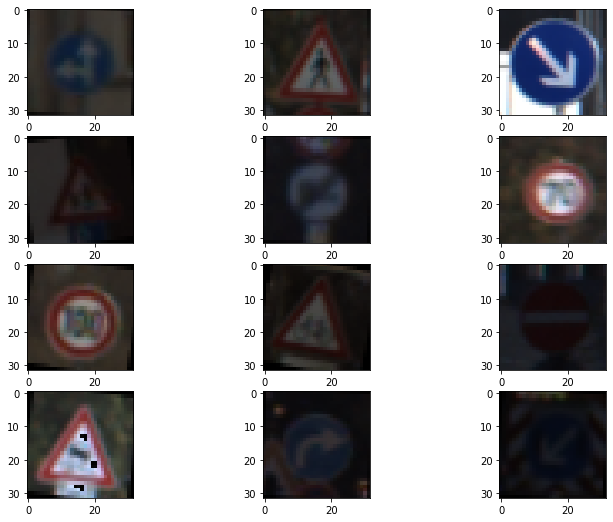

In [7]:
# Example of an image from the dataset
f,axarr = plt.subplots(4,3,figsize=(12,9))

for idx in range (0,12):
    index = idx
    idx1 = int(np.floor(idx/3))
    idx2 = (idx%3)
    axarr[idx1][idx2].imshow(x_train_org[index])
    print ("y = " + str(y_train_org[index]))

In [8]:
y_train_org.reshape(-1).shape

(86989,)

In [9]:
yy= convert_to_one_hot(y_train_org[:5],nlabels)
yy.shape

[37 27 38 28 42]
43


(5, 43)

### Create  Train/Test sets

In [10]:
x_train = x_train_org/255.
x_test  = x_test_org/255.
y_train = convert_to_one_hot(y_train_org,nlabels)
y_test  = convert_to_one_hot(y_test_org,nlabels)
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

[37 27 38 ... 11 14 30]
43
[25 11 38 ...  8 33 10]
43
number of training examples = 86989
number of test examples = 12630
X_train shape: (86989, 32, 32, 3)
Y_train shape: (86989, 43)
X_test shape: (12630, 32, 32, 3)
Y_test shape: (12630, 43)


In [11]:
def convolutional_model(input_shape,stride,fsize):
    #
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters=16,kernel_size=(fsize,fsize),
                   strides=stride,padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(4,4),
                       strides=4,padding='same')(A1)

    Z2 = tfl.Conv2D(16,(4,4),1,padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=4,padding='same')(A2)

    F = tfl.Flatten()(P1)    
    #
    outputs = tfl.Dense(units=43,activation='softmax')(F)
    model   = tf.keras.Model(inputs=input_img,outputs=outputs)
    return model

In [12]:
conv_model = convolutional_model((32,32,3),stride=1,fsize=8)
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
#nparameters = f*f*3*nfilters+nfilters

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        3088      
                                                                 
 re_lu (ReLU)                (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 43)                44075     
                                                             

# Train the Model

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((
                x_train, y_train)).batch(64)
test_dataset  = tf.data.Dataset.from_tensor_slices((
                x_test, y_test)).batch(64)
history = conv_model.fit(train_dataset,epochs=15,
                         validation_data=test_dataset)

Epoch 1/15
1360/1360 [==============================] - 141s 103ms/step - loss: 1.2523 - accuracy: 0.7183 - val_loss: 0.8500 - val_accuracy: 0.8169
Epoch 2/15
1360/1360 [==============================] - 128s 94ms/step - loss: 0.3890 - accuracy: 0.9262 - val_loss: 0.6933 - val_accuracy: 0.8625
Epoch 3/15
1360/1360 [==============================] - 126s 92ms/step - loss: 0.2338 - accuracy: 0.9573 - val_loss: 0.7147 - val_accuracy: 0.8699
Epoch 4/15
1360/1360 [==============================] - 127s 93ms/step - loss: 0.1672 - accuracy: 0.9697 - val_loss: 0.6776 - val_accuracy: 0.8804
Epoch 5/15
1360/1360 [==============================] - 125s 92ms/step - loss: 0.1294 - accuracy: 0.9764 - val_loss: 0.6799 - val_accuracy: 0.8903
Epoch 6/15
1360/1360 [==============================] - 125s 92ms/step - loss: 0.1024 - accuracy: 0.9813 - val_loss: 0.7207 - val_accuracy: 0.8851
Epoch 7/15
1360/1360 [==============================] - 128s 94ms/step - loss: 0.0847 - accuracy: 0.9837 - val_loss: 

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

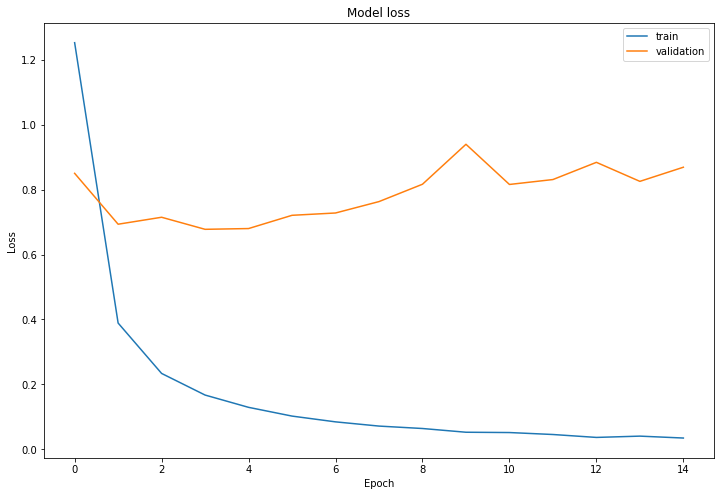

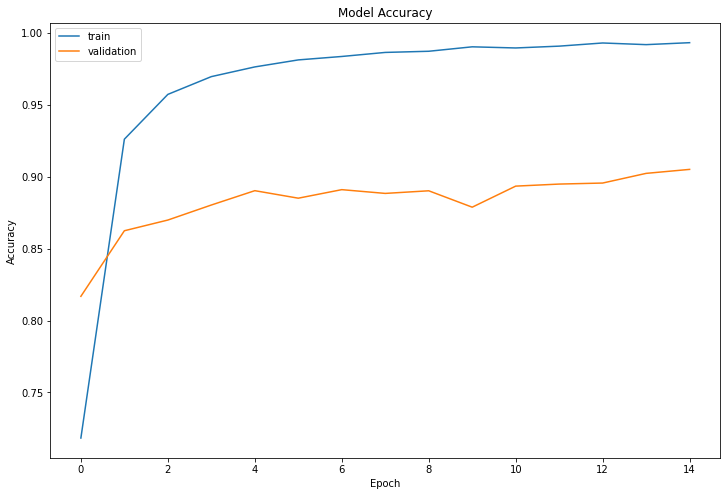

In [15]:
df_loss_acc = pd.DataFrame(history.history)

df_loss= df_loss_acc[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']].copy(deep=True)
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')